### The goal of this notebook is to explore modifcations to LAISS.

In [ ]:
# !pip install numpy pandas pillow astropy matplotlib scikit-learn
# !pip install astro_ghost --no-cache-dir
# !pip install timeout_decorator
# !pip install gdown
# !pip install confluent-kafka
# !pip install antares_client --no-deps
# !pip install annoy

# TODO: Figure out how to install these packages
# !pip install light-curve

In [41]:
import os

# a silly hack to switch the working directory to the one where this file is located
working_dir = os.path.abspath("")

import time
import datetime
import math
import numpy as np
import pandas as pd
import sys
import astro_ghost
import os
import subprocess

os.chdir(working_dir)
sys.path.append('../code/')

# TODO: Uncomment these once installing all packages
# from helper_functions import *
# from laiss_functions import *

import requests
from requests.auth import HTTPBasicAuth

import warnings
warnings.filterwarnings("ignore")

# TODO: Delete these once able to install all packages
import matplotlib.pyplot as plt

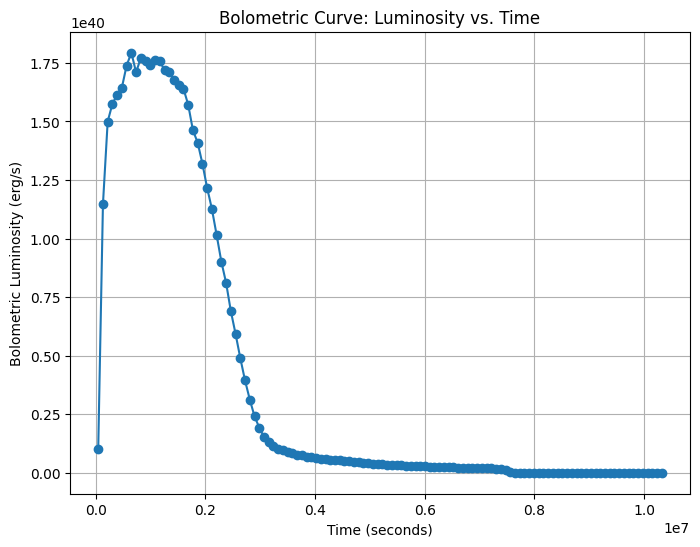

In [47]:
def plot_bolometric_curve(filename, magnitude=False):
    data = np.loadtxt(filename, skiprows=1)
    
    # Extract columns for time, wavelength, and luminosity density
    times = data[:, 0]
    wavelengths = data[:, 1]
    llam = data[:, 2]

    unique_times = np.unique(times)

    # Sum luminosity density over wavelengths for each time step
    bolometric_luminosity = []
    for time in unique_times:
        total_luminosity = llam[times == time].sum()
        bolometric_luminosity.append(total_luminosity)
    
    # If magnitude=True, convert bolometric luminosity to absolute magnitude
    if magnitude:
        L0 = 3.828e33  # Reference luminosity (erg/s)
        bolometric_magnitude = [-2.5 * np.log10(L / L0) for L in bolometric_luminosity]

    plt.figure(figsize=(8, 6))
    
    if magnitude:
        plt.plot(unique_times, bolometric_magnitude, marker='o', linestyle='-')
        plt.ylabel('Absolute Magnitude')
        plt.title('Bolometric Curve: Magnitude vs. Time')
    else:
        plt.plot(unique_times, bolometric_luminosity, marker='o', linestyle='-')
        plt.ylabel('Bolometric Luminosity (erg/s)')
        plt.title('Bolometric Curve: Luminosity vs. Time')

    plt.xlabel('Time (seconds)')
    plt.grid(True)
    plt.show()

    if magnitude:
        return np.array(bolometric_magnitude)
    else:
        return np.array(bolometric_luminosity)

bolometric_curve = plot_bolometric_curve("../data/sed_m60.0_mrp5.57_m560.000.dat", magnitude=False)


#### LAISS Features:

```python
print(f"Number of lc features: {len(lc_features)}")
print(f"LIGHTCURVE FEATURES: \n")
print("\n".join(lc_features))
print("\n")

print(f"Number of host features: {len(host_features)}")
print(f"HOST FEATURES: \n")
print("\n".join(host_features))
```

Number of lc features: 62 \
LIGHTCURVE FEATURES: \
\
feature_amplitude_magn_r
feature_anderson_darling_normal_magn_r
feature_beyond_1_std_magn_r
feature_beyond_2_std_magn_r
feature_cusum_magn_r
feature_inter_percentile_range_2_magn_r
feature_inter_percentile_range_10_magn_r
feature_inter_percentile_range_25_magn_r
feature_kurtosis_magn_r
feature_linear_fit_slope_magn_r
feature_linear_fit_slope_sigma_magn_r
feature_magnitude_percentage_ratio_40_5_magn_r
feature_magnitude_percentage_ratio_20_5_magn_r
feature_mean_magn_r
feature_median_absolute_deviation_magn_r
feature_percent_amplitude_magn_r
feature_median_buffer_range_percentage_10_magn_r
feature_median_buffer_range_percentage_20_magn_r
feature_percent_difference_magnitude_percentile_5_magn_r
feature_percent_difference_magnitude_percentile_10_magn_r
feature_skew_magn_r
feature_standard_deviation_magn_r
feature_stetson_k_magn_r
feature_weighted_mean_magn_r
feature_anderson_darling_normal_flux_r
feature_cusum_flux_r
feature_excess_variance_flux_r
feature_kurtosis_flux_r
feature_mean_variance_flux_r
feature_skew_flux_r
feature_stetson_k_flux_r
feature_amplitude_magn_g
feature_anderson_darling_normal_magn_g
feature_beyond_1_std_magn_g
feature_beyond_2_std_magn_g
feature_cusum_magn_g
feature_inter_percentile_range_2_magn_g
feature_inter_percentile_range_10_magn_g
feature_inter_percentile_range_25_magn_g
feature_kurtosis_magn_g
feature_linear_fit_slope_magn_g
feature_linear_fit_slope_sigma_magn_g
feature_magnitude_percentage_ratio_40_5_magn_g
feature_magnitude_percentage_ratio_20_5_magn_g
feature_mean_magn_g
feature_median_absolute_deviation_magn_g
feature_median_buffer_range_percentage_10_magn_g
feature_median_buffer_range_percentage_20_magn_g
feature_percent_amplitude_magn_g
feature_percent_difference_magnitude_percentile_5_magn_g
feature_percent_difference_magnitude_percentile_10_magn_g
feature_skew_magn_g
feature_standard_deviation_magn_g
feature_stetson_k_magn_g
feature_weighted_mean_magn_g
feature_anderson_darling_normal_flux_g
feature_cusum_flux_g
feature_excess_variance_flux_g
feature_kurtosis_flux_g
feature_mean_variance_flux_g
feature_skew_flux_g
feature_stetson_k_flux_g


Number of host features: 58\
HOST FEATURES: \
\
gmomentXX
gmomentXY
gmomentYY
gmomentR1
gmomentRH
gPSFFlux
gApFlux
gKronFlux
gKronRad
gExtNSigma
rmomentXX
rmomentXY
rmomentYY
rmomentR1
rmomentRH
rPSFFlux
rApFlux
rKronFlux
rKronRad
rExtNSigma
imomentXX
imomentXY
imomentYY
imomentR1
imomentRH
iPSFFlux
iApFlux
iKronFlux
iKronRad
iExtNSigma
zmomentXX
zmomentXY
zmomentYY
zmomentR1
zmomentRH
zPSFFlux
zApFlux
zKronFlux
zKronRad
zExtNSigma
ymomentXX
ymomentXY
ymomentYY
ymomentR1
ymomentRH
yPSFFlux
yApFlux
yKronFlux
yKronRad
yExtNSigma
i-z
gApMag_gKronMag
rApMag_rKronMag
iApMag_iKronMag
zApMag_zKronMag
yApMag_yKronMag
7DCD
dist/DLR